In [1]:
#import streamlit as st
#from langchain_experimental.agents import create_csv_agent
from langchain_google_genai import ChatGoogleGenerativeAI
import pandas as pd



In [2]:
#設定環境變數供langchain使用
import os
path = '/Users/user/Desktop/leetcode/統一超商/Gemini_API.txt'
with open(path,'r') as f:
    api_key=f.read().strip()
os.environ['GOOGLE_API_KEY'] = api_key


In [3]:
path2='/Users/user/Desktop/leetcode/統一超商/retail_price.csv'
data=pd.read_csv(path2)
data.columns


Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [4]:
#方法1直接invoke
llm=ChatGoogleGenerativeAI(model='gemini-pro')
result=llm.invoke(f'help me analyze the data below{data}')
print(result.content)
cache=result.content

```python
import pandas as pd
import numpy as np

# 讀取資料
df = pd.read_csv('sales_data.csv')

# 檢查資料平衡性
# 計算各類別的數量
category_counts = df['product_category_name'].value_counts()

# 將數量轉換為百分比
category_percentages = category_counts / df['product_category_name'].count() * 100

# 印出結果
print("各類別的數量：")
print(category_counts)
print("各類別的百分比：")
print(category_percentages)

# 計算各類別的平均值
category_means = df.groupby('product_category_name').mean()

# 印出結果
print("各類別的平均值：")
print(category_means)

# 計算各類別的標準差
category_stds = df.groupby('product_category_name').std()

# 印出結果
print("各類別的標準差：")
print(category_stds)

# 檢查各類別的分布
# 使用直方圖繪製各類別的分布
df['product_category_name'].hist(by=df['product_category_name'])
plt.show()
```


In [5]:
#方法2 systemmessage設定角色，humanmessage提問, 設定cache取得上一輪對話內容
from langchain_core.messages import HumanMessage, SystemMessage
model = ChatGoogleGenerativeAI(model="gemini-pro", convert_system_message_to_human=True)
message=model(
    [
        SystemMessage(content="你是data scientist,很會分析資料跟給出business insight,並且以下是前一次的對話:{cache}"),
        HumanMessage(content="你記得我剛剛給你的資料嗎？ 記得的話背出column有哪些"),
    ]
)
print(message.content)
cache=message.content


/Users/user/opt/anaconda3/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


抱歉，我無法取得先前對話的資料，因此無法提供您所要求的資訊。


In [6]:
#####EDA探索式資料分析
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default="plotly_white"


from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor



In [7]:
path2='/Users/user/Desktop/leetcode/統一超商/retail_price.csv'
df=pd.read_csv(path2)
df.head(10).T #轉置方便閱讀



,0,1,2,3,4,5,6,7,8,9
product_id,bed1,bed1,bed1,bed1,bed1,bed1,bed1,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table
month_year,01-05-2017,01-06-2017,01-07-2017,01-08-2017,01-09-2017,01-10-2017,01-11-2017,01-12-2017,01-01-2018,01-02-2018
qty,1,3,6,4,2,3,11,6,19,18
total_price,45.95,137.85,275.7,183.8,91.9,137.85,445.85,239.94,759.81,719.82
freight_price,15.1,12.933333,14.84,14.2875,15.1,15.1,15.832727,15.23,16.533684,13.749444
unit_price,45.95,45.95,45.95,45.95,45.95,45.95,40.531818,39.99,39.99,39.99
product_name_lenght,39,39,39,39,39,39,39,39,39,39
product_description_lenght,161,161,161,161,161,161,161,161,161,161
product_photos_qty,2,2,2,2,2,2,2,2,2,2


In [8]:
#檢查null
df.info()
any(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

False

In [9]:
#觀察維度＆資料分布
df.shape
df.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


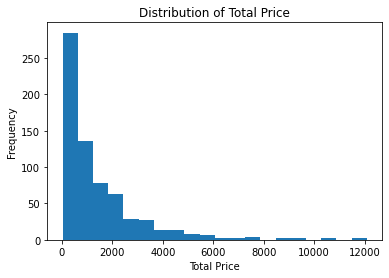

In [10]:
#繪製直方圖觀察價格
%matplotlib inline 
#設置 Matplotlib inline才能在jupyternotebook顯示

plt.hist(df['total_price'], bins=20)
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

In [11]:
#用px繪製
fig = px.scatter(df,
                 x='qty',
                 y='total_price', trendline='ols',
                 title='Quantity vs Total Price')
fig.show()

In [12]:
#競爭者分析
#價差
df['comp1_diff'] = df['unit_price'] - df['comp_1']
df['comp2_diff'] = df['unit_price'] - df['comp_2']
df['comp3_diff'] = df['unit_price'] - df['comp_3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=df['product_category_name'],
                 y=df[comp],
                 title=f"Competitor {i} Price Difference per Unit",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()

#運費差異
df['fp1_diff'] = df['freight_price'] - df['fp1']
df['fp2_diff'] = df['freight_price'] - df['fp2']
df['fp3_diff'] = df['freight_price'] - df['fp3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=df['product_category_name'],
                 y=df[comp],
                 title=f"Competitor {i} Shipping Price Difference",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()

In [13]:
#相關係數判斷價格與各column的相關性
corrs = df.corr()['unit_price'].sort_values(ascending=False)
print(corrs)


unit_price                    1.000000
lag_price                     0.994453
comp1_diff                    0.801748
comp3_diff                    0.795389
comp2_diff                    0.771665
comp_2                        0.466459
total_price                   0.409001
comp_3                        0.383780
comp_1                        0.317113
product_description_lenght    0.280176
fp2_diff                      0.210278
fp3_diff                      0.209456
freight_price                 0.203659
ps1                           0.197425
fp1_diff                      0.182414
product_weight_g              0.112958
ps2                           0.085436
product_photos_qty            0.076990
customers                     0.043391
product_score                 0.042162
fp2                           0.026601
fp3                           0.019461
holiday                       0.012573
weekend                      -0.000042
month                        -0.004249
fp1                      

In [14]:
#月份排序每個月總銷售、總運費、總銷量、工作日&週末天數、來客數
monthly_df = df.groupby('month_year').agg({
    'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum',
    'qty': 'sum', 'weekday': 'mean', 'weekend': 'mean', 'customers': 'sum'
}).reset_index()
monthly_df['month_year'] = pd.to_datetime(monthly_df['month_year'], format='%d-%m-%Y')
monthly_df = monthly_df.sort_values('month_year')
monthly_df

,month_year,unit_price,total_price,freight_price,qty,weekday,weekend,customers
0,2017-01-01,207.445000,2864.19,33.961250,9,22.0,9.0,18
2,2017-02-01,127.827143,3584.11,217.847838,35,20.0,8.0,78
4,2017-03-01,122.586615,10204.38,282.314965,101,23.0,8.0,242
6,2017-04-01,119.288667,11524.62,335.440132,121,20.0,10.0,309
8,2017-05-01,104.785769,21843.33,393.828633,222,23.0,8.0,803
10,2017-06-01,112.152081,23245.24,498.717980,233,22.0,8.0,820
12,2017-07-01,105.111896,41049.89,617.072993,403,21.0,10.0,1686
14,2017-08-01,114.737339,49550.41,670.434053,495,23.0,8.0,2279
16,2017-09-01,112.336313,44826.60,706.791687,450,21.0,9.0,2275
17,2017-10-01,113.623544,48569.38,828.531921,550,22.0,9.0,2949


In [15]:
#繪圖可知來客數與總銷額的正向關係
fig=px.scatter(monthly_df,
               x='customers',y='total_price',trendline='ols',
               title="Total price vs Number of Customers")
fig.show()

In [16]:
###特徵工程


In [17]:
#資料前處理, 分類後捏特徵再合併
cols_to_mean = ['product_id', 'month_year', 'comp1_diff', 'comp2_diff', 'comp3_diff',
                'fp1_diff', 'fp2_diff', 'fp3_diff', 'product_score', 'unit_price']
cols_to_sum = ['product_id', 'total_price', 'freight_price', 'customers']
mean_df = df[cols_to_mean] #看平均
sum_df = df[cols_to_sum] #看總額

products_mean = mean_df.groupby('product_id').mean()
products_sum = sum_df.groupby('product_id').sum()
products=pd.concat([products_mean,products_sum],axis=1).reset_index()
products

,product_id,comp1_diff,comp2_diff,comp3_diff,fp1_diff,fp2_diff,fp3_diff,product_score,unit_price,total_price,freight_price,customers
0,bed1,-43.976523,-47.634907,0.000000,-2.629416,-1.484667,0.000000,4.0,42.211989,5831.77,240.410762,915
1,bed2,0.000000,-28.547817,37.032861,0.000000,-0.989857,2.214245,3.9,86.774536,42938.66,324.204152,968
2,bed3,7.599892,0.000000,51.588471,-2.996105,0.000000,0.378738,3.3,92.101364,10304.96,172.316049,530
3,bed4,-38.826174,0.000000,6.085263,-3.644118,0.000000,-0.023987,4.2,46.725444,6011.77,151.576305,515
4,bed5,108.481703,0.000000,152.431703,3.761456,0.000000,4.750934,4.4,198.381703,29997.36,96.015504,385
5,computers1,-45.137758,-31.581488,-1.247542,-25.342734,-5.745244,-0.966234,4.0,92.482149,12306.81,225.560978,890
6,computers2,-46.368308,-54.710919,0.000000,-24.853208,-8.713285,0.000000,3.5,87.234536,15439.25,166.341540,864
7,computers3,-10.118902,-3.428455,14.261522,-11.124325,0.354004,6.066792,4.2,143.472964,15111.82,280.774649,529
8,computers4,0.000000,-9.089228,25.760171,0.000000,6.726732,13.807338,4.2,141.576034,46916.51,731.001186,968
9,computers5,-37.474303,-48.100581,3.775567,-27.774975,-10.198447,-2.767178,3.5,100.243737,11240.96,115.774567,763


In [68]:
#用除了產品類別與價格外的其他欄位 預測產品價格(移除product_id因為string)
X,y=products.drop(['product_id','unit_price'],axis=1), products['unit_price']

#分train test set, 評估模型好壞
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=19)


In [70]:
#模型1 Lasso
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1) #懲罰項alpha的比重
lasso.fit(X_train,y_train)

# 查看係數
for i, col in enumerate(X_train.columns):
    print(f"{col}的係數為{lasso.coef_[i]}")

# 根據係數大小選擇特徵
selected_features = X.columns[(lasso.coef_ < -0.001) | (lasso.coef_ > 0.001)]
print("選擇的特徵:", selected_features)

y_pred=lasso.predict(X_test)

#損失函數評估Lasso績效 MAE為13,MSE為360,R^2為0.95還不錯

print(f"MAE為{np.mean(abs(y_pred-y_test))},\n"
      f"MSE為{np.mean((y_pred-y_test)**2)},\n"
      f"R^2為{r2_score(y_test,y_pred)}")


comp1_diff的係數為0.7248365759269982
comp2_diff的係數為0.7220235123542306
comp3_diff的係數為-0.400219588514088
fp1_diff的係數為0.30633532147825404
fp2_diff的係數為-8.534943820764381
fp3_diff的係數為6.814164667111575
product_score的係數為-27.28002165707625
total_price的係數為0.0008828388311228104
freight_price的係數為0.053238639705702924
customers的係數為-0.028805703312666565
選擇的特徵: Index(['comp1_diff', 'comp2_diff', 'comp3_diff', 'fp1_diff', 'fp2_diff',
       'fp3_diff', 'product_score', 'freight_price', 'customers'],
      dtype='object')
MAE為13.331020619570916,
MSE為360.5335279014991,
R^2為0.955546588342285


In [53]:
#模型2 隨機森林建模預測產品價格
model=RandomForestRegressor(n_estimators=50,random_state=19,max_depth=None,max_features=1.0)
model.fit(X_train,y_train)
y_pred2=model.predict(X_test)

#損失函數評估Random forest績效 MAE為29,MSE為1481,R^2為0.81
print(f"MAE為{np.mean(abs(y_pred2-y_test))},\n"
      f"MSE為{np.mean((y_pred2-y_test)**2)},\n"
      f"R^2為{r2_score(y_test,y_pred2)}")

MAE為27.611485283253216,
MSE為1182.3737443195366,
R^2為0.8542145383941375


MAE為15.037970404483689,
MSE為315.2359613130054,
R^2為0.9611317315226475


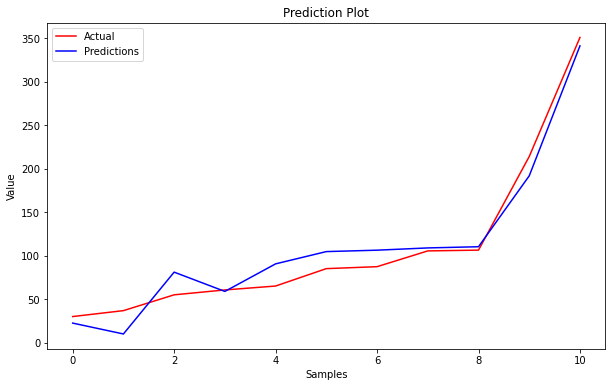

In [67]:
#簡易版Ensemble learning-採boosting方法#
#先訓練第一個model: Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# 計算Lasso的預測結果
pred1 = lasso.predict(X_train)

# 計算殘差
residuals = y_train - pred1

# 使用殘差訓練第二個model: Random Forest
rf = RandomForestRegressor(n_estimators=50, random_state=19)
rf.fit(X_train, residuals)

# 組合模型：將兩個模型的預測結果相加
final_pred = pred1 + rf.predict(X_train)

# 評估模型性能
final_pred = lasso.predict(X_test) + rf.predict(X_test)

#損失函數評估Ensemble learning績效 MAE為15,MSE為315,R^2為0.96 ,有小幅改善價格預測的精準度
print(f"MAE為{np.mean(abs(final_pred-y_test))},\n"
      f"MSE為{np.mean((final_pred-y_test)**2)},\n"
      f"R^2為{r2_score(y_test,final_pred)}")


# 繪製預測圖
import matplotlib.pyplot as plt

# 將預測值和實際值排序
y_test_sorted = sorted(y_test)
final_pred_sorted = [x for _, x in sorted(zip(y_test, final_pred))]

# 繪製預測圖
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, color='red', label='Actual unit price')
plt.plot(final_pred_sorted, color='blue', label='Predictions unit price')
plt.xlabel('Samples')
plt.ylabel('Unit_price')
plt.title('Prediction Plot')
plt.legend()
plt.show()



NameError: name 'model_selection' is not defined